In [1]:
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

## Introduction

This notebook serves as an aid to the discussion of using an artificial starting solution for the primal simplex algorithm.  The notebook solves a sample problem via a graphical solution and the discussion will arrive at the same solution using the primal simplex algorithm.

## Model Definition

The sample LP model described below will used to demonstrate the technique.

$$\text{min } 4x + 6y $$
$$\text{s.t.} $$
$$x-y \ge -3$$
$$2x+y \ge 6$$
$$3x+y \le 23 $$
$$x-2y \le -2 $$
$$x,y \ge 0$$

## Graphical Solution

### Feasible Region Definition

In [2]:
def constr1_trace():
    x = np.arange(0,10,0.1)
    y = x + 3
    return go.Scatter(
        x = x,
        y = y,
        name = 'Constraint 1',
        fill='tozeroy'
    )

def constr2_trace():
    x = np.arange(0,3, 0.1)
    y = 6-2*x
    return go.Scatter(
        x=x,
        y=y,
        name='Constraint 2 - Lower Bound'
    )

def constr3_trace():
    x = np.arange(0,23/3, 0.1)
    y = 23 - 3*x
    return go.Scatter(
        x=x,
        y=y,
        name = 'Constraing 3',
        fill='tozeroy'
    )

def constr4_trace():
    x = np.arange(0,10,0.1)
    y = (1/2)*(x+2)
    return go.Scatter(
        x=x,
        y=y,
        name='Constraint 4 - Lower Bound'
    )

constraint_traces = [constr1_trace(), constr2_trace(), constr3_trace(), constr4_trace()]

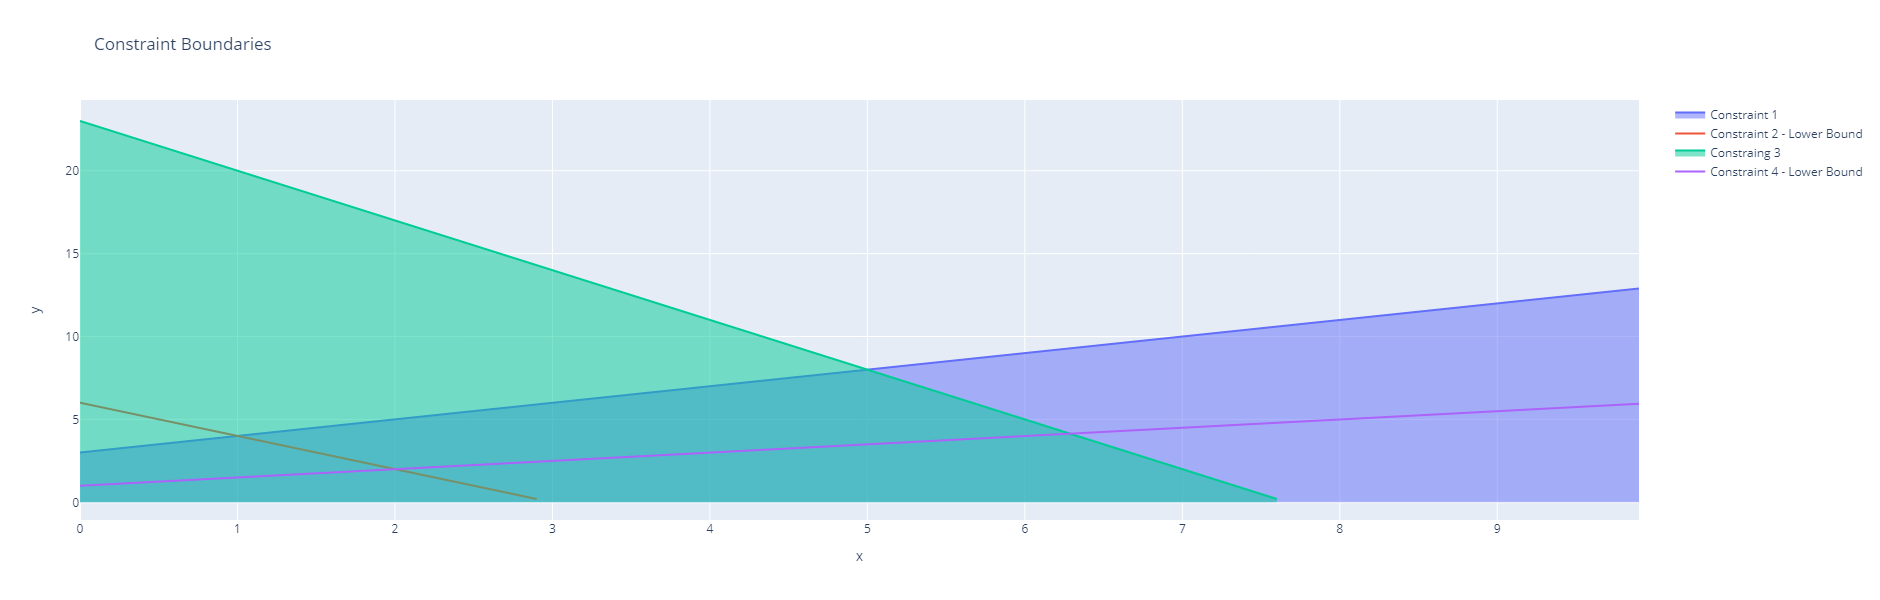

In [3]:
layout = {
 'height': 600,
 'title': {'text': 'Constraint Boundaries'},
 'xaxis': {'title': 'x'},
 'yaxis': {'title': 'y'}
}

fig = go.Figure(data=constraint_traces, layout=layout)
iplot(fig)

Determination of verticies of the feasible region.

In [4]:
A = np.array([[1,-1],[2,1]])
b = np.array([-3,6])
vertices_1_2 = np.linalg.solve(A,b)
vertices_1_2

array([1., 4.])

In [5]:
A = np.array([[1,-1],[3,1]])
b = np.array([-3,23])
vertices_1_3 = np.linalg.solve(A,b)
vertices_1_3

array([5., 8.])

In [6]:
A = np.array([[2,1],[1,-2]])
b = np.array([6,-2])
vertices_2_4 = np.linalg.solve(A,b)
vertices_2_4

array([2., 2.])

In [7]:
A = np.array([[3,1],[1,-2]])
b = np.array([23,-2])
vertices_3_4 = np.linalg.solve(A,b)
vertices_3_4

array([6.28571429, 4.14285714])

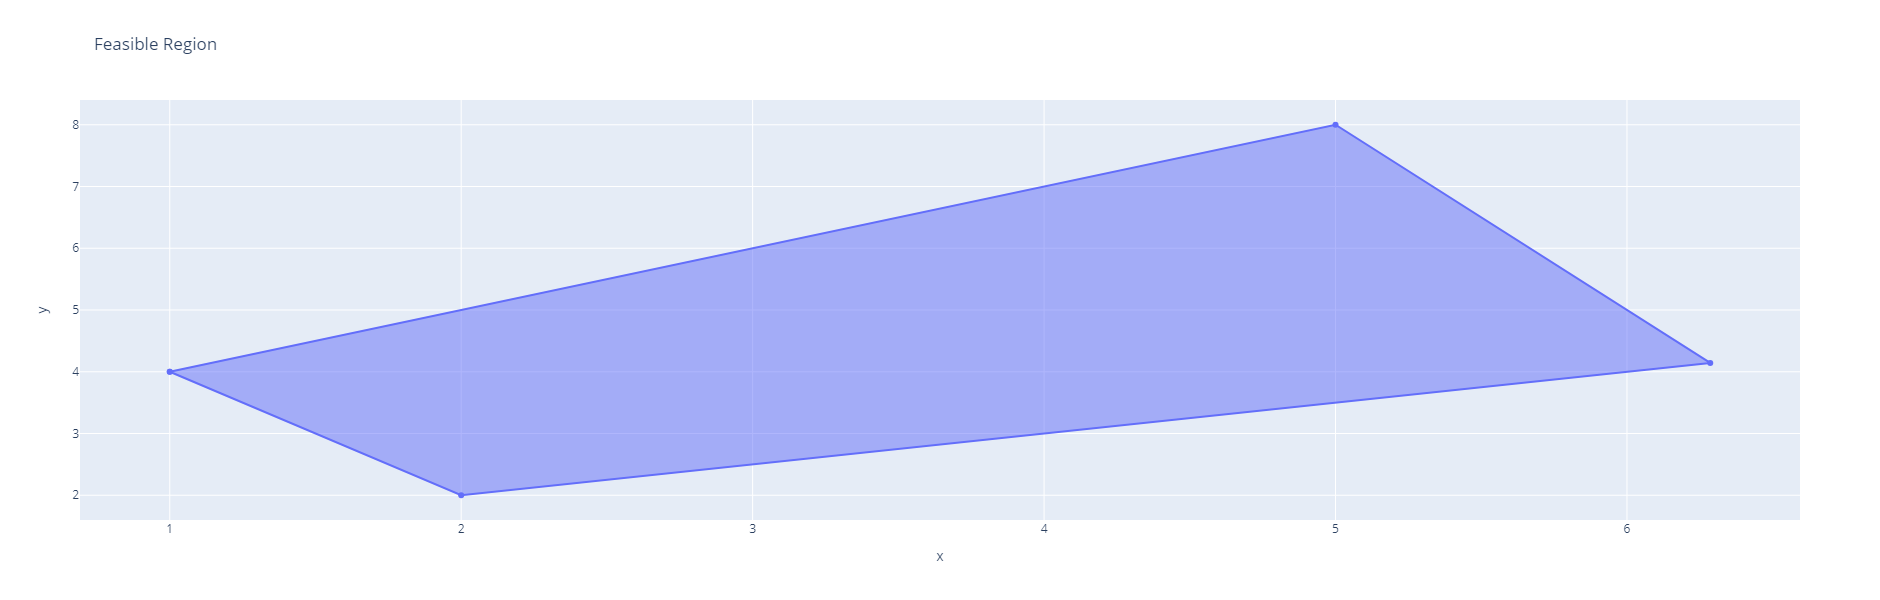

In [10]:
feasible_region = go.Scatter(
    x=[vertices_1_2[0], vertices_1_3[0], vertices_3_4[0], vertices_2_4[0], vertices_1_2[0]],
    y=[vertices_1_2[1], vertices_1_3[1], vertices_3_4[1], vertices_2_4[1], vertices_1_2[1]],
    fill='toself'
)

layout['title']['text'] = 'Feasible Region'
fig = go.Figure(data=[feasible_region], layout=layout)
iplot(fig)

### Objective Function Trials

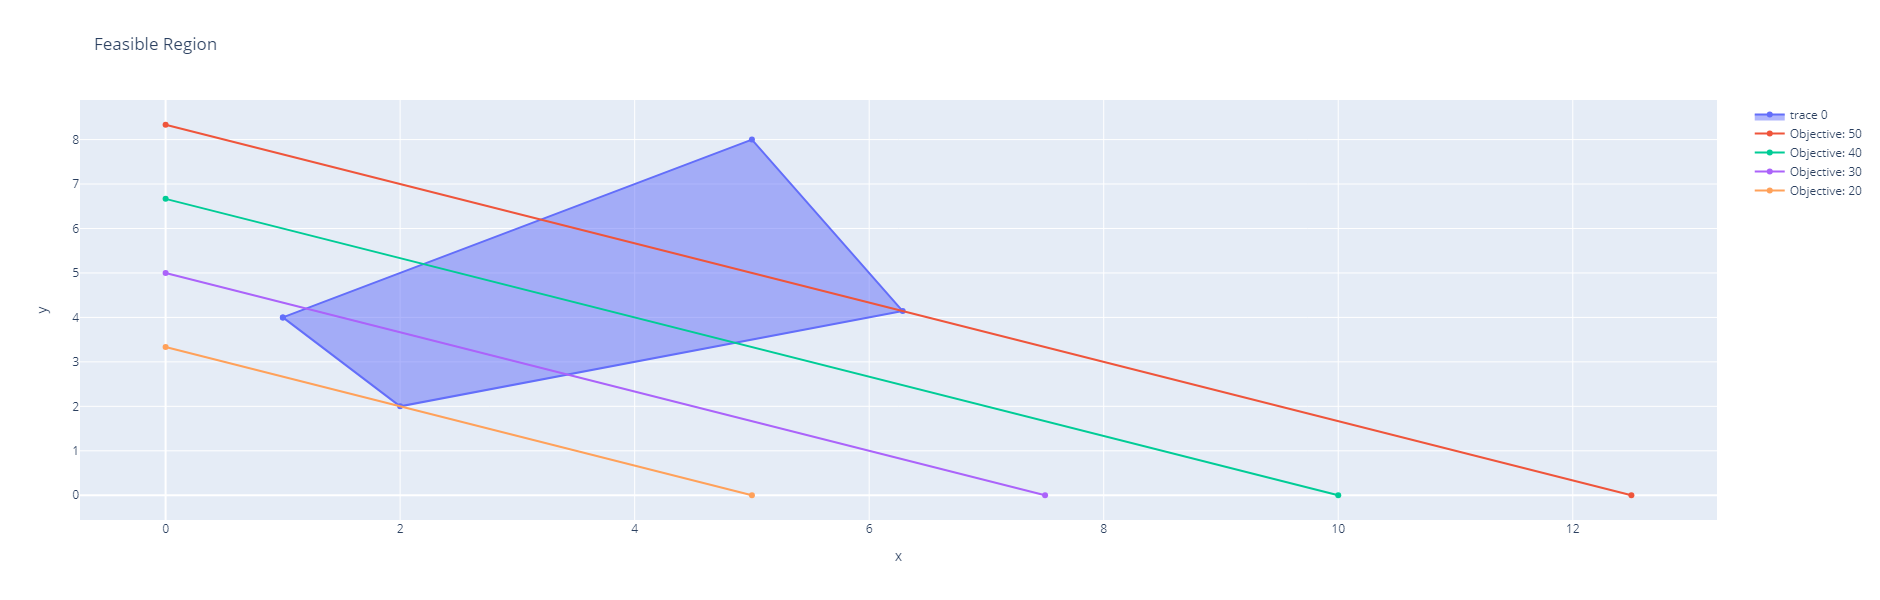

In [11]:
obj_traces = []
for z in [50, 40, 30, 20]:
    obj_traces.append(go.Scatter(
        x=[z/4,0],
        y=[0,z/6],
        name=f'Objective: {z}'
    ))
    
fig = go.Figure(data=[feasible_region]+obj_traces, layout=layout)
iplot(fig)

In [12]:
print("**Optimal Solution**")
print(f"x: {vertices_2_4[0]}")
print(f"y: {vertices_2_4[1]}")
print(f"Objective Function Value: {4*vertices_2_4[0] + 6*vertices_2_4[1]}")

**Optimal Solution**
x: 2.0
y: 2.0
Objective Function Value: 20.0
